In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [58]:
print("Hello World")

Hello World


In [59]:
os.getcwd()

'/Users/henrynguyen/Desktop/Spring_2023(2nd Junior)/Data_Science_Lab/Final'

# Data Exploration


In [60]:
fraud_df = pd.read_csv('Synthetic_Financial_datasets_log.csv')

In [61]:
print(fraud_df.columns)
len(fraud_df.columns)


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


11

In [62]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [63]:
fraud_df.amount.describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

<Axes: >

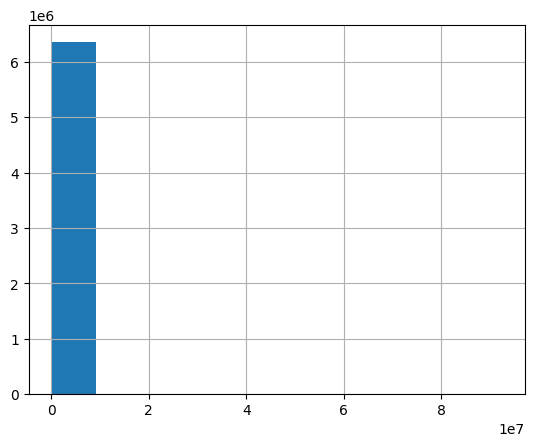

In [64]:
fraud_df["amount"].hist()

# Preprocess the Data

>  

*  Check whether there are missing values
*  Check whether this dataset is balanced or not


*   Check whether this dataset is balanced or not (use the bar plot to visualize the number of positive and negative samples)
*  Check whether theare are cateogrical features






In [65]:
# Check whether there are missing values
print(fraud_df.shape)
fraud_df.isnull().sum()

(6362620, 11)


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [66]:
#check if dataset is balanced or not

In [67]:
fraud_df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<Axes: xlabel='isFraud'>

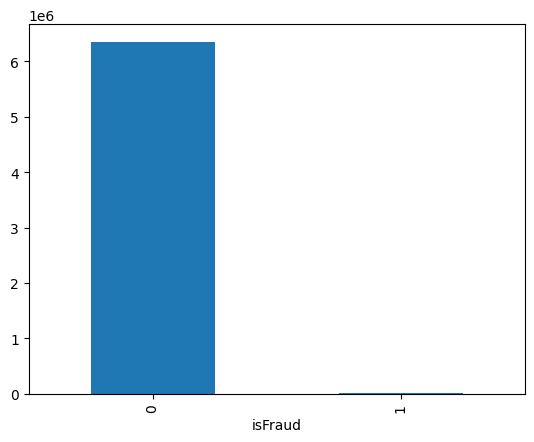

In [68]:
fraud_df.isFraud.value_counts().plot(kind="bar")

In [69]:
#categoeical features
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Get Feature set and Class set

In [70]:
X=fraud_df.drop(columns="isFraud",inplace=False)

In [71]:
X

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,0


In [72]:
Y=fraud_df.loc[:,"isFraud"]
Y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

# Feauture Engineering


*   Use Mutual Infomation Gain to see feauture importance
* Normalize data
* encode categorical features






In [73]:
X.drop(columns=["nameDest","nameOrig"],inplace=True)
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,0


In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [75]:
Le=LabelEncoder()

In [76]:
X_encoded=Le.fit_transform(X["type"])

In [77]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,0


In [78]:
X_encoded=X_encoded.tolist()

In [79]:
X_decode=X["type"].tolist()

In [80]:
code_map={}
for item1, item2 in zip(X_decode,X_encoded):
    val=code_map.get(item1,item2)
    code_map[item1]=val

In [81]:
code_map 

{'PAYMENT': 3, 'TRANSFER': 4, 'CASH_OUT': 1, 'DEBIT': 2, 'CASH_IN': 0}

Code_map is to see what number meant what feature value after label encoding. We prefer label encoding here since we when we visualize the clusters we need data points as the axis. Well, maybe after PCA and we get new feautures it wouldnt matter. What do you think?

In [82]:
X["type"]=Le.fit_transform(X["type"])

In [83]:
#MI_Scores=mutual_info_classif(np.array(X),np.array(Y),random_state=None)

In [84]:
#df_columns=X.columns.tolist()
#feauture_importance_dict=dict(zip(df_columns,MI_Scores))


In [85]:
#MI_Score_Dataset=pd.DataFrame([feauture_importance_dict])
#MI_Score_Dataset

In [86]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,4,181.00,181.00,0.00,0.00,0.00,0
3,1,1,181.00,181.00,0.00,21182.00,0.00,0
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,0
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,0
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,0
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,0


In [87]:
X.type.value_counts()

type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

Mutual information measures the amount of information shared between two variables. It is calculated based using the concept of entropy. As Mutual Information gain scores increase, it implies a higher dependency between the feature and target variable. I have to go back to youtube to relearn the details of it, lol.   

In [88]:
X.drop(columns=["isFlaggedFraud","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","amount"],inplace=True)
X

,step,type
0,1,3
1,1,3
2,1,4
3,1,1
4,1,3
...,...,...
6362615,743,1
6362616,743,4
6362617,743,1
6362618,743,4


In [89]:
ct=ColumnTransformer(transformers=[('normalize',StandardScaler(),[0,1])],remainder='passthrough')
X=ct.fit_transform(X)

In [90]:
pd.DataFrame(X)

,0,1
0,-1.703042,0.952399
1,-1.703042,0.952399
2,-1.703042,1.693076
3,-1.703042,-0.528954
4,-1.703042,0.952399
...,...,...
6362615,3.510123,-0.528954
6362616,3.510123,1.693076
6362617,3.510123,-0.528954
6362618,3.510123,1.693076


In [91]:
feauture_list=["step","type"]

In [92]:
X=pd.DataFrame(X,columns=feauture_list)

In [93]:
print(X)

             step      type
0       -1.703042  0.952399
1       -1.703042  0.952399
2       -1.703042  1.693076
3       -1.703042 -0.528954
4       -1.703042  0.952399
...           ...       ...
6362615  3.510123 -0.528954
6362616  3.510123  1.693076
6362617  3.510123 -0.528954
6362618  3.510123  1.693076
6362619  3.510123 -0.528954

[6362620 rows x 2 columns]


In [94]:
pip install imbalanced-learn



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [95]:
from imblearn.over_sampling import SMOTE
smote =SMOTE()
X_smote,Y_smote=smote.fit_resample(X,Y)

We oversample minority class to create balanced dataset.Clustering algrothims like K-means can be sensitive to imbalanced classes. There are advantages and disadvantages to this so maybe we could discuss this point later 

In [96]:
from sklearn.model_selection import StratifiedShuffleSplit
Y=pd.DataFrame(Y)

Sampled_Data = StratifiedShuffleSplit(n_splits=1, test_size=0.99998, random_state=52)

# Perform stratified sampling
for train_index, _ in Sampled_Data.split(X_smote, Y_smote):
    X_stratified_sampled = X_smote.iloc[train_index]
    Y_stratified_sampled = Y_smote.iloc[train_index]


We perform stratified sampling so not only to reduce the number of samples but to keep the same class distribution. We can mess around with how many samples we want by reducing the test size for less samples 

In [97]:
Y_stratified_sampled = pd.DataFrame(Y_stratified_sampled)

Y_stratified_sampled.isFraud.value_counts()

isFraud
0    127
1    127
Name: count, dtype: int64

<Axes: xlabel='isFraud'>

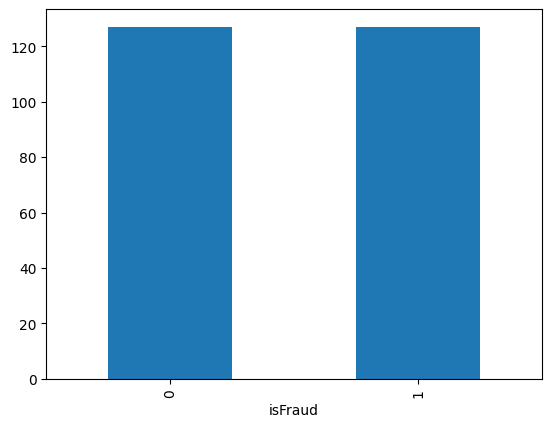

In [98]:
Y_stratified_sampled.isFraud.value_counts().plot(kind="bar")

Dataset is now balanced

In [99]:
len(Y_stratified_sampled)

254

# Important Note

The Author of the dataset says to remove oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest features. Most likely due to the bias in that an if new balance is great then there any algortithm would say "Fraud", when in actuality it could just be a regular transfer. Also because when fraud happens these arent really feautures people would have access to, unlike features such as "amount" or "payement type". I think the MI_scores even show this since they values for them are pretty low. We could potenitally still use these features though. What do you think? I also removed all the columns those are just ID's which are just noise. Also we could probably remove some of the features with low MI_scores or keep them for PCA. What do you think?

# Use PCA For Dimensionality Reduction

Havent used the PCA yet, I'm just going to start the doc now. Could you handle this part? This can be the last part for our progress one since we have a lot to write about!

In [100]:
# Testing x and y stratified are the new data set
print(X_stratified_sampled)
print(Y_stratified_sampled)

              step      type
305732   -1.597654  0.952399
11288275  1.852028  1.693076
12471070 -0.108178 -0.528954
6620585   1.781770  1.693076
3469649   0.102596 -0.528954
...            ...       ...
9850959  -1.337698 -0.528954
9043973   2.385991 -0.528954
12110771 -1.492267 -0.528954
3753830   0.250139 -0.528954
5314625   0.910567  1.693076

[254 rows x 2 columns]
          isFraud
305732          0
11288275        1
12471070        1
6620585         1
3469649         0
...           ...
9850959         1
9043973         1
12110771        1
3753830         0
5314625         0

[254 rows x 1 columns]


In [101]:
# scaling x ensures that all variables contribute equally to the principal components.
# align indices starting from 0
X_stratified_sampled.reset_index(drop=True, inplace=True)
Y_stratified_sampled.reset_index(drop=True, inplace=True)

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X_stratified_sampled) 
print(X_scaled)




[[-1.70512048  0.63345433]
 [ 1.02009302  1.32697761]
 [-0.52844989 -0.75359222]
 [ 0.96458969  1.32697761]
 [-0.3619399  -0.75359222]
 [-0.00671858 -1.4471155 ]
 [ 0.43175772 -0.75359222]
 [-1.61076482 -1.4471155 ]
 [-0.00671858 -0.75359222]
 [ 0.35405306 -0.75359222]
 [-0.14547691 -1.4471155 ]
 [-1.59411382 -0.75359222]
 [ 0.96458969 -0.75359222]
 [-0.69495988  1.32697761]
 [-0.23983257 -0.75359222]
 [-0.37645561  1.32697761]
 [-1.70512048 -1.4471155 ]
 [-0.2453829  -0.06006895]
 [ 1.94699863  1.32697761]
 [ 0.49836172 -0.75359222]
 [ 0.39979758 -0.75359222]
 [ 0.44840872 -0.75359222]
 [-0.62280555 -0.75359222]
 [-1.7320401  -0.75359222]
 [-1.69401981 -0.75359222]
 [ 1.319811    1.32697761]
 [-0.83926853  1.32697761]
 [ 0.26524773 -0.75359222]
 [ 1.67503232  1.32697761]
 [-0.58395322  1.32697761]
 [-0.81151687 -0.75359222]
 [ 0.59766569  1.32697761]
 [-0.69495988  1.32697761]
 [ 0.42620739  1.32697761]
 [-1.69957015 -0.06006895]
 [ 0.13203974 -0.75359222]
 [ 1.73053565  1.32697761]
 

Basically, pca is the process figuring out the most IMPORTANT features that has the most impact on the targe variable (isfraud)

In [102]:
from sklearn.decomposition import PCA

# pca, reduce the number of features from 8 to 2
pca = PCA(n_components=2)
X_r = pca.fit(X_stratified_sampled).transform(X_scaled)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [103]:
print('number of new features: {}'.format(X_r.shape[1]))

number of new features: 2


PC1 cover the most variance in terms of features from the data set, then PC2 woule be second

In [104]:
X_r_df = pd.DataFrame(X_r, columns=['PC1', 'PC2'])
print(X_r_df)

          PC1       PC2
0   -2.024067  1.079446
1    0.778040  0.842888
2   -1.366138 -0.616308
3    0.725593  0.861053
4   -1.208798 -0.670802
..        ...       ...
249 -2.283957 -0.298425
250  0.495721 -1.261156
251 -2.399339 -0.258463
252 -1.098660 -0.708948
253  0.075254  1.086296

[254 rows x 2 columns]


In [105]:
con_with_y = pd.concat([X_r_df, Y_stratified_sampled], axis = 1)
print(con_with_y)

          PC1       PC2  isFraud
0   -2.024067  1.079446        0
1    0.778040  0.842888        1
2   -1.366138 -0.616308        1
3    0.725593  0.861053        1
4   -1.208798 -0.670802        0
..        ...       ...      ...
249 -2.283957 -0.298425        1
250  0.495721 -1.261156        1
251 -2.399339 -0.258463        1
252 -1.098660 -0.708948        0
253  0.075254  1.086296        0

[254 rows x 3 columns]


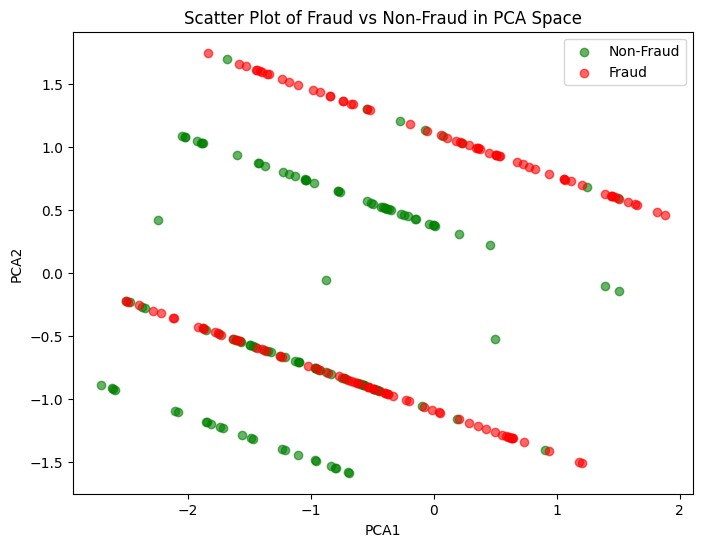

In [106]:
pca1 = con_with_y['PC1']
pca2 = con_with_y['PC2']

# Extract fraud labels
fraud_labels = con_with_y['isFraud']

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca1[fraud_labels == 0], pca2[fraud_labels == 0], color='green', label='Non-Fraud',alpha=0.6)
plt.scatter(pca1[fraud_labels == 1], pca2[fraud_labels == 1], color='red', label='Fraud',alpha=0.6)


plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Scatter Plot of Fraud vs Non-Fraud in PCA Space')

plt.legend()
plt.show()

In [107]:
min_pca1 = pca1.min()
max_pca1 = pca1.max()

max_pca2 = pca2.max()
min_pca2 = pca2.min()


print("Maximum value in PCA1:", max_pca1)
print("Minimum value in PCA1:", min_pca1)

print("Maximum value in PCA1:", max_pca2)
print("Minimum value in PCA1:", min_pca2)


Maximum value in PCA1: 1.8794220660976801
Minimum value in PCA1: -2.704980918839859
Maximum value in PCA1: 1.7474923962456557
Minimum value in PCA1: -1.585888688741057


# Elbow Method for Optimal number of Clusters

In [108]:
X_r_df

,PC1,PC2
0,-2.024067,1.079446
1,0.778040,0.842888
2,-1.366138,-0.616308
3,0.725593,0.861053
4,-1.208798,-0.670802
...,...,...
249,-2.283957,-0.298425
250,0.495721,-1.261156
251,-2.399339,-0.258463
252,-1.098660,-0.708948


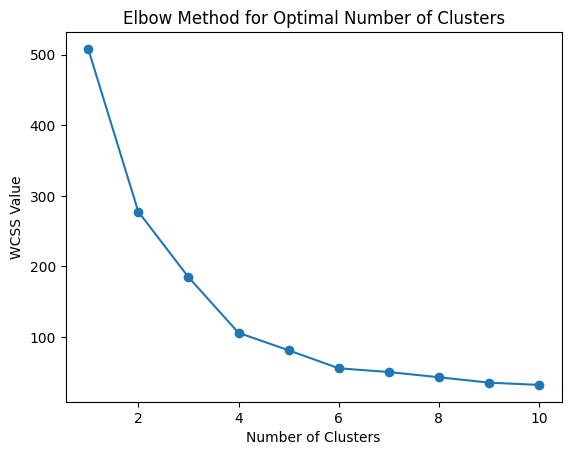

In [109]:
from sklearn.cluster import KMeans
WCSS=[]

for cluster in range(1,11):
    kmeans=KMeans(n_clusters=cluster,random_state=10)
    kmeans.fit(X_r_df)
    WCSS.append(kmeans.inertia_)
x=np.arange(10)+1 

plt.scatter(x,WCSS)
plt.plot(x,WCSS)
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS Value")
plt.show()

# Partition with K-means


#Partition with K-means++

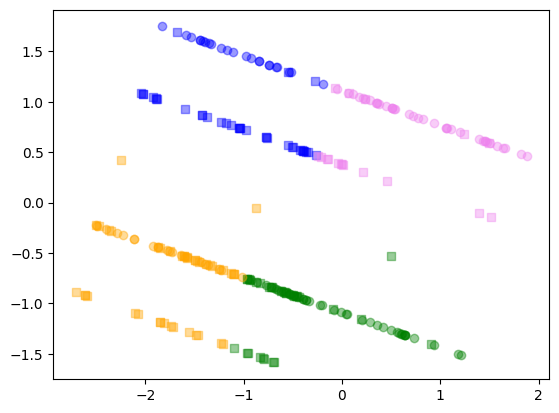

In [110]:
kmeans=KMeans(n_clusters=4,random_state=10)
kmeans.fit(X_r_df)
predicted_partitions=kmeans.labels_
predicted_partitions=np.array(predicted_partitions)
colors=["blue","green","violet","orange"]
cluster_values=[0,1,2,3]
classes=[0,1]


for color_val,i in zip(colors,cluster_values):
    for class_val in classes:
        mark="s" if class_val==0 else 'o'
        plt.scatter(X_r_df.values[((predicted_partitions==i) & (Y_stratified_sampled.values.squeeze()==class_val)) ,0],X_r_df.values[((predicted_partitions==i) & (Y_stratified_sampled.values.squeeze()==class_val)),1],color=color_val,alpha=.4,marker=mark)
   

In [123]:
from sklearn.metrics import silhouette_score
silhouette_avg_KMeans = silhouette_score(X_r_df, predicted_partitions)
print("Silhouette Score for KMeans:", silhouette_avg_KMeans)

Silhouette Score for KMeans: 0.4826311667377601


In [124]:
check1=X_r_df.values
print(check1.shape)
print(Y_stratified_sampled.values.shape)
print(predicted_partitions.shape)

(254, 2)
(254, 1)
(254,)


# Specteral Clustering

### Parition with Specteral Clustering 

In [125]:
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score



cluster_sp_nn = SpectralClustering(n_clusters=4, assign_labels="discretize", affinity='nearest_neighbors', random_state=0,n_jobs=-1).fit(X_r_df)

cluster_sp_nn_label = cluster_sp_nn.labels_ 
silhouette_avg = silhouette_score(X_r_df, cluster_sp_nn_label)
print("Silhouette score of the Spectral Clustering (nearest_neighbors):", silhouette_avg)

      


Silhouette score of the Spectral Clustering (nearest_neighbors): 0.31294586328872337


### Visualize Specteral Clustering

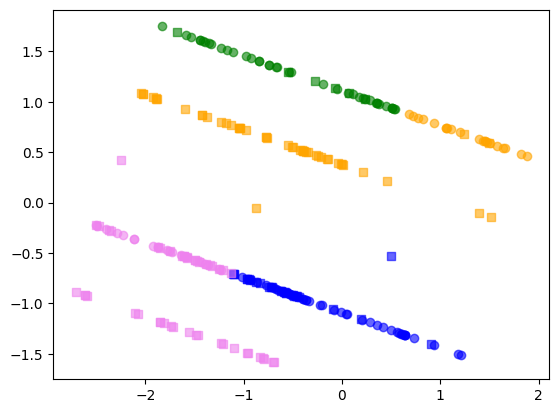

In [126]:

for color_val,i in zip(colors,cluster_values):
    for class_val in classes:
        mark="s" if class_val==0 else 'o'
        plt.scatter(X_r_df.values[((cluster_sp_nn_label==i) & (Y_stratified_sampled.values.squeeze()==class_val)) ,0],X_r_df.values[((cluster_sp_nn_label==i) & (Y_stratified_sampled.values.squeeze()==class_val)),1],color=color_val,alpha=.6,marker=mark)
   

# Partition with Aggolomerative Method

In [127]:
from sklearn.cluster import AgglomerativeClustering

# Fit Agglomerative Clustering
cluster_agglo = AgglomerativeClustering(n_clusters=4).fit(X_r_df)
cluster_agglo_label = cluster_agglo.labels_

# Calculate Silhouette Score
silhouette_avg_agglo = silhouette_score(X_r_df, cluster_agglo_label)
print("Silhouette Score for Agglomerative Clustering:", silhouette_avg_agglo)

Silhouette Score for Agglomerative Clustering: 0.47746530480718696


### Visualize Aggolomerative Clustering

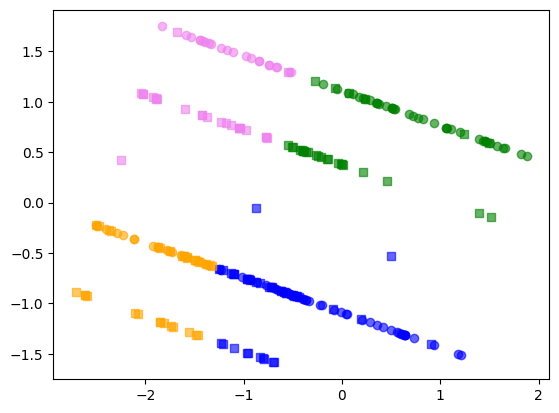

In [128]:
# For reference
# colors=["blue","green","violet","orange"]
# cluster_values=[0,1,2,3]
# classes=[0,1]

for color_val,i in zip(colors,cluster_values):
    for class_val in classes:
        mark="s" if class_val==0 else 'o'
        plt.scatter(X_r_df.values[((cluster_agglo_label==i) & (Y_stratified_sampled.values.squeeze()==class_val)) ,0],X_r_df.values[((cluster_agglo_label==i) & (Y_stratified_sampled.values.squeeze()==class_val)),1],color=color_val,alpha=.6,marker=mark)

# Evaluate Models with Sillhoute Score


* Use bar graph to visualize scores of each model



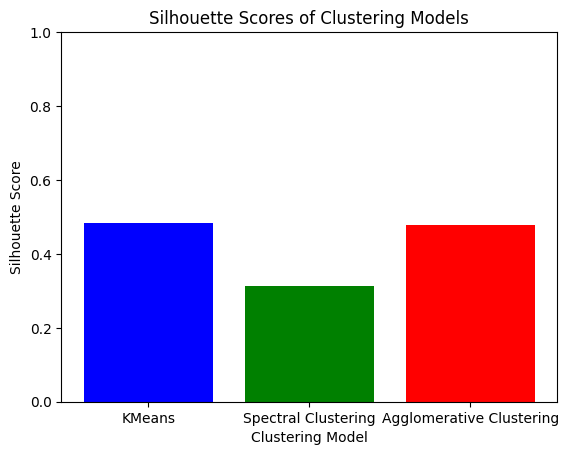

In [129]:
import matplotlib.pyplot as plt

# Silhouette scores for each model
silhouette_scores = [silhouette_avg_KMeans, silhouette_avg, silhouette_avg_agglo]

# When import these clustering algorithms from scikit-learn, refer back to them using their class name
model_names = ['KMeans', 'Spectral Clustering', 'Agglomerative Clustering']

# Plot bar graph
plt.bar(model_names, silhouette_scores, color=['blue', 'green', 'red'])
plt.xlabel('Clustering Model')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores of Clustering Models')
plt.ylim(0, 1)  # Set y-axis limit to better visualize scores
plt.show()